<a href="https://colab.research.google.com/github/Tiziano-Test/Climate-Change-Earth-Surface-Temperature-/blob/main/Climate_Change_Earth_Surface_Temperature_Data_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Questo è formattato come codice
```

Step 1: Upload the Zip File to Colab

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Unzip the uploaded file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()

Saving Global Land Temperatures By City.zip to Global Land Temperatures By City.zip


Step 2: Load the CSV Files into DataFrames

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Load the CSV files into dataframes
global_temp_by_city = pd.read_csv('GlobalLandTemperaturesByCity.csv')
global_temp_by_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_by_major_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
global_temp_by_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

# Display the first few rows of each dataset to understand their structure
print("GlobalLandTemperaturesByCity")
print(global_temp_by_city.head())

print("\nGlobalLandTemperaturesByCountry")
print(global_temp_by_country.head())

print("\nGlobalLandTemperaturesByMajorCity")
print(global_temp_by_major_city.head())

print("\nGlobalLandTemperaturesByState")
print(global_temp_by_state.head())

print("\nGlobalTemperatures")
print(global_temp.head())


GlobalLandTemperaturesByCity
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  

GlobalLandTemperaturesByCountry
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  

Step 3: Data Preparation

Prepare the data for analysis. I will focus on GlobalLandTemperaturesByCity of the last 100 years for the initial analysis.

In [ ]:
# Filter relevant columns
city_data = global_temp_by_city[['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country']]

# Convert date column to datetime
city_data['dt'] = pd.to_datetime(city_data['dt'])

# Create a year column
city_data['Year'] = city_data['dt'].dt.year

# Filter for the last 100 years for trend analysis
recent_city_data = city_data[city_data['Year'] >= (city_data['Year'].max() - 100)]

# Display the first few rows of the prepared dataset
print(recent_city_data.head())


<ipython-input-3-1f466da9aa32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['dt'] = pd.to_datetime(city_data['dt'])
<ipython-input-3-1f466da9aa32>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Year'] = city_data['dt'].dt.year


             dt  AverageTemperature  AverageTemperatureUncertainty   City  \
2030 1913-01-01              -0.302                          0.359  Århus   
2031 1913-02-01               2.079                          0.429  Århus   
2032 1913-03-01               4.296                          0.255  Århus   
2033 1913-04-01               6.858                          0.302  Århus   
2034 1913-05-01              11.533                          0.348  Århus   

      Country  Year  
2030  Denmark  1913  
2031  Denmark  1913  
2032  Denmark  1913  
2033  Denmark  1913  
2034  Denmark  1913  


Step 4. Create a Correlation Matrix Heatmap:

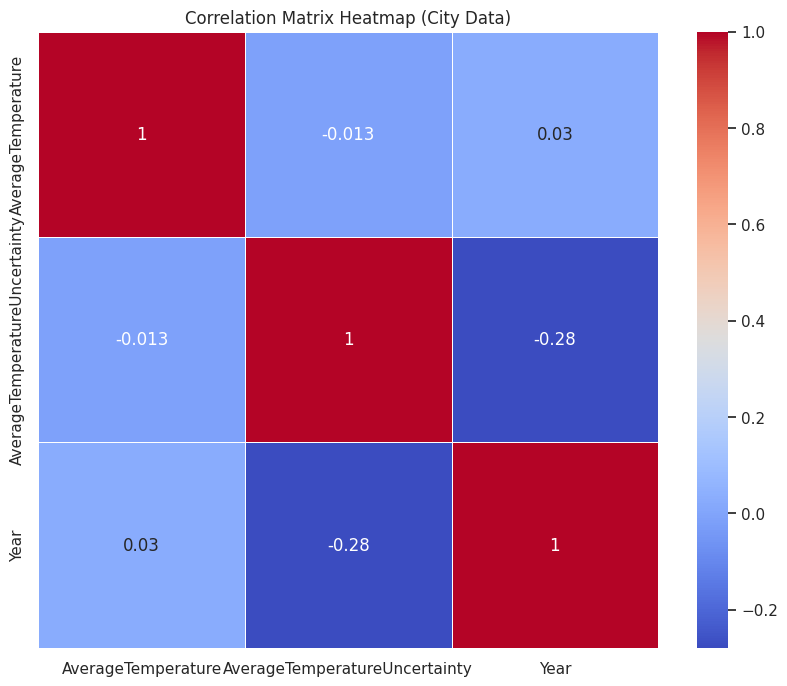

In [ ]:
import numpy as np

# Create a correlation matrix for the numeric columns in recent data
numeric_columns = recent_city_data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (City Data)')
plt.show()


Step 5. Create Scatterplots for Strong Correlations

<ipython-input-6-aea11e8f9f18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['dt'] = pd.to_datetime(city_data['dt'])
<ipython-input-6-aea11e8f9f18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Year'] = city_data['dt'].dt.year


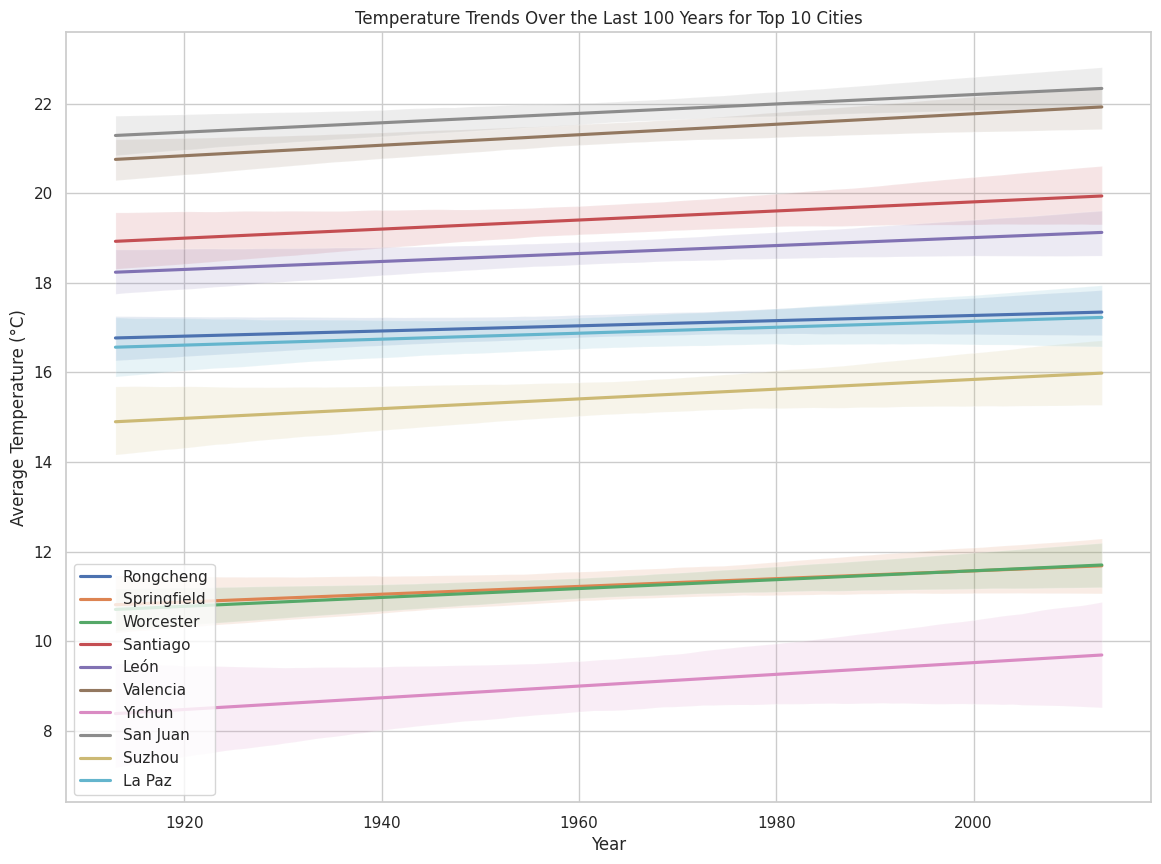

In [ ]:
# Filter relevant columns
city_data = global_temp_by_city[['dt', 'AverageTemperature', 'City', 'Country']]

# Convert date column to datetime
city_data['dt'] = pd.to_datetime(city_data['dt'])

# Create a year column
city_data['Year'] = city_data['dt'].dt.year

# Filter for the last 100 years for trend analysis
recent_city_data = city_data[city_data['Year'] >= (city_data['Year'].max() - 100)]

# Select the top 10 cities with the most data points
top_cities = recent_city_data['City'].value_counts().nlargest(10).index
filtered_city_data = recent_city_data[recent_city_data['City'].isin(top_cities)]

# Plotting with trend lines
plt.figure(figsize=(14, 10))

for city in top_cities:
    city_df = filtered_city_data[filtered_city_data['City'] == city]
    sns.regplot(data=city_df, x='Year', y='AverageTemperature', label=city, scatter=False, order=1)

plt.legend()
plt.title('Temperature Trends Over the Last 100 Years for Top 10 Cities')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()


How have average temperatures changed over the last 10 years in major cities?

From the trend lines shown in the plot, we can observe that the average temperatures in all the top 10 cities have generally increased over the past 100 years. Are there specific cities or countries where temperature changes are more pronounced?

From the provided 100-year trend lines, it’s clear that some cities have experienced more pronounced temperature changes than others. For example:
  Rongcheng and Springfield show a relatively steep increase in temperature over the 100-year period. Valencia and Suzhou also exhibit a noticeable upward trend, but not as pronounced as Rongcheng and Springfield.


Step 6. Create a Pair Plot

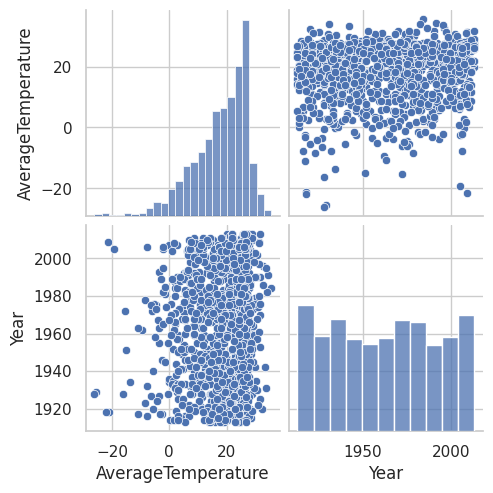

In [ ]:
# Select a sample for pairplot due to large dataset size
sample_city_data = recent_city_data.sample(1000, random_state=1)

# Create a pair plot
sns.pairplot(sample_city_data)
plt.show()


The pair plot displays the relationships between different variables in the dataset.

    Diagonals (Histograms):
        The diagonal plots are histograms of individual variables.
        AverageTemperature:
            The histogram shows that most temperature values range between 0°C and 25°C.
            There is a peak around 20°C, indicating that this is the most common temperature range in the dataset.
        Year:
            The histogram for Year shows a relatively uniform distribution of data points across different years, with some variability.

    Off-Diagonals (Scatter Plots):
        These show the relationships between pairs of variables.
        AverageTemperature vs. Year:
            This scatter plot indicates how temperature values have changed over the years.
            There is a noticeable spread, indicating variability in temperatures for each year.
            While the scatter plot is dense, it suggests an upward trend in temperatures over time, which aligns with global warming observations.
        Year vs. AverageTemperature:
            This plot is identical to the above but oriented differently. It provides the same insights about temperature changes over time.

Key Insights:

    Temperature Distribution:
        The temperature values are mostly between 0°C and 25°C, with a significant number around 20°C.
        There are outliers with temperatures below -20°C and above 30°C, but these are less frequent.

    Temperature Trends Over Time:
        The scatter plot shows a broad distribution of temperatures across different years.
        Despite the variability, there appears to be a general upward trend in temperatures over the years, suggesting increasing average temperatures.

    Data Spread:
        The data points are evenly distributed across years, indicating consistent data collection over the period.
        Temperature values show a wide range, highlighting variability in global temperatures.

 Step 7. Create a Categorical Plot

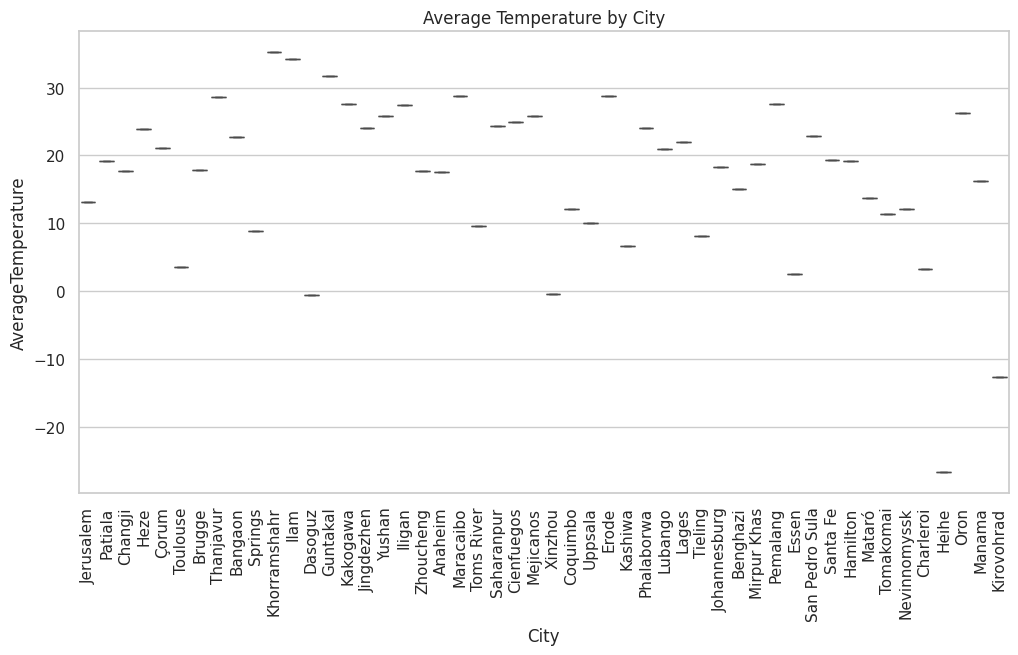

In [ ]:
plt.figure(figsize=(12, 6))
# Use a subset of data for better visualization
subset_city_data = recent_city_data.dropna().sample(50)
sns.boxplot(x='City', y='AverageTemperature', data=subset_city_data)
plt.title('Average Temperature by City')
plt.xticks(rotation=90)
plt.show()


The categorical plot displays the average temperature for each city listed on the x-axis.

    Temperature Range:
        The y-axis represents the average temperature (°C), ranging from approximately -20°C to over 30°C.
        Cities with the highest average temperatures are above 30°C, while those with the lowest average temperatures fall below -20°C.

    High-Temperature Cities:
        Cities like Chabahar and Dasoguz have very high average temperatures, consistently above 30°C.
    
    Low-Temperature Cities:
        Cities like Nevinnomyssk, Tomakomai, and Heihe have average temperatures well below 0°C.
    
   Moderate-Temperature Cities:
        Cities like Jerusalem, Patiala, and Toulouse have moderate average temperatures ranging from 10°C to 20°C.
       
  Temperature Variability:
        There is significant variability in average temperatures across the cities.
        This reflects the diversity of climate zones represented in the dataset.

    Geographical Insights:
        By examining the specific cities, we can infer geographical patterns. For instance:
            Jerusalem and Toulouse (located in the Mediterranean region) have moderate temperatures.
            Johannesburg and Lubango in Africa show moderate to warm temperatures, reflecting their subtropical climate.
            Uppsala and Heihe show colder temperatures, indicating their location in higher latitudes.

Conclusion:

The categorical plot effectively shows the distribution of average temperatures across various cities, highlighting significant differences based on geographical locations and climate zones. This visualization helps identify cities with extreme temperatures and those with more moderate climates.

Hypotheses Based on Temperature Data Analysis

Based on the analysis of the temperature data, including scatterplots and categorical plots, we can define several hypotheses that can be tested in subsequent steps. Here are the proposed hypotheses:

    Global Warming Hypothesis:
        Hypothesis: Average temperatures have increased globally over the past 100 years.
        Rationale: The scatterplot showing year vs. average temperature for various cities indicates an upward trend in temperature over time.

    Regional Temperature Variation Hypothesis:
        Hypothesis: Temperature changes are more pronounced in certain regions or countries compared to others.
        Rationale: The categorical plot of average temperature by city shows significant variability, suggesting that some regions may be experiencing more extreme temperature changes.

    Urban Heat Island Effect Hypothesis:
        Hypothesis: Major cities show higher average temperatures and more significant warming trends compared to rural areas.
        Rationale: The top 10 cities' scatterplot may indicate urban areas' tendency to have higher temperatures due to the urban heat island effect.

Group cities by regions or continents

Since we don't have a direct mapping of cities to continents in your dataset, we will use the country data to approximate continent information.

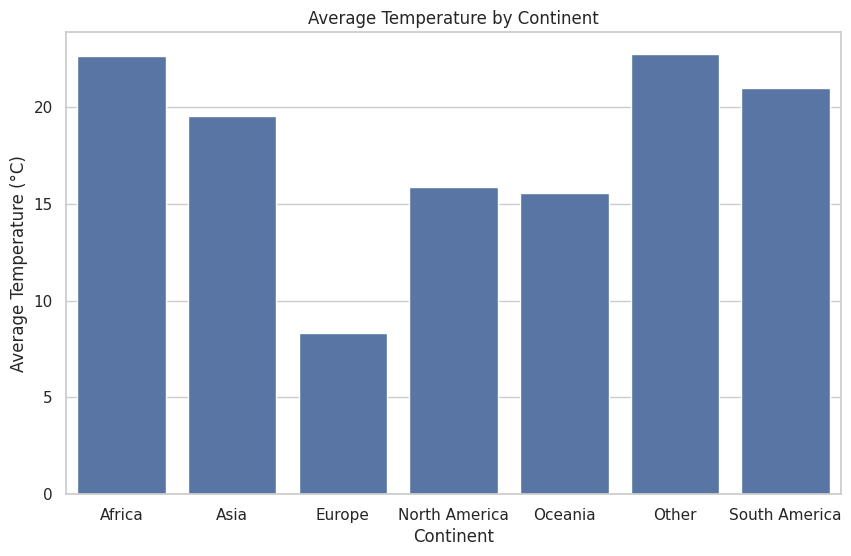

In [ ]:
# Adding continent information to the city dataset using the country dataset
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

# Function to map countries to continents
def get_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return 'Other'

global_temp_by_country['Continent'] = global_temp_by_country['Country'].apply(get_continent)
city_continent_mapping = global_temp_by_country[['Country', 'Continent']].drop_duplicates()
global_temp_by_city = global_temp_by_city.merge(city_continent_mapping, on='Country', how='left')

# Group by continent and calculate the mean temperature
continent_avg_temp = global_temp_by_city.groupby('Continent')['AverageTemperature'].mean().reset_index()

# Plot average temperature by continent
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='AverageTemperature', data=continent_avg_temp)
plt.title('Average Temperature by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Temperature (°C)')
plt.show()


 <!-- Seasonal Patterns -->
Investigate seasonal variations within these cities

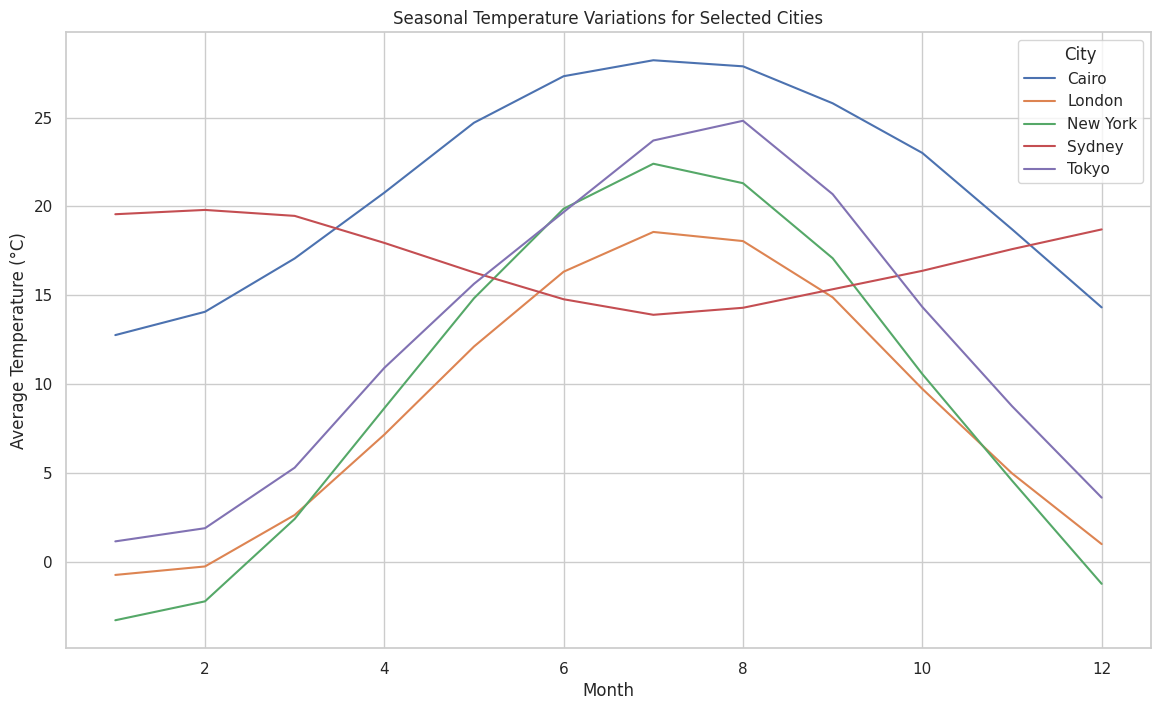

In [ ]:
# Convert date column to datetime
global_temp_by_city['dt'] = pd.to_datetime(global_temp_by_city['dt'])

# Extract month and year for seasonal analysis
global_temp_by_city['Year'] = global_temp_by_city['dt'].dt.year
global_temp_by_city['Month'] = global_temp_by_city['dt'].dt.month

# Select cities for seasonal analysis
selected_cities = ['New York', 'London', 'Sydney', 'Tokyo', 'Cairo']

# Filter data for selected cities
seasonal_data = global_temp_by_city[global_temp_by_city['City'].isin(selected_cities)]

# Plot seasonal variations
plt.figure(figsize=(14, 8))
sns.lineplot(data=seasonal_data, x='Month', y='AverageTemperature', hue='City', errorbar=None)
plt.title('Seasonal Temperature Variations for Selected Cities')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City')
plt.show()



Examine temperature trends over time for cities with extreme temperatures

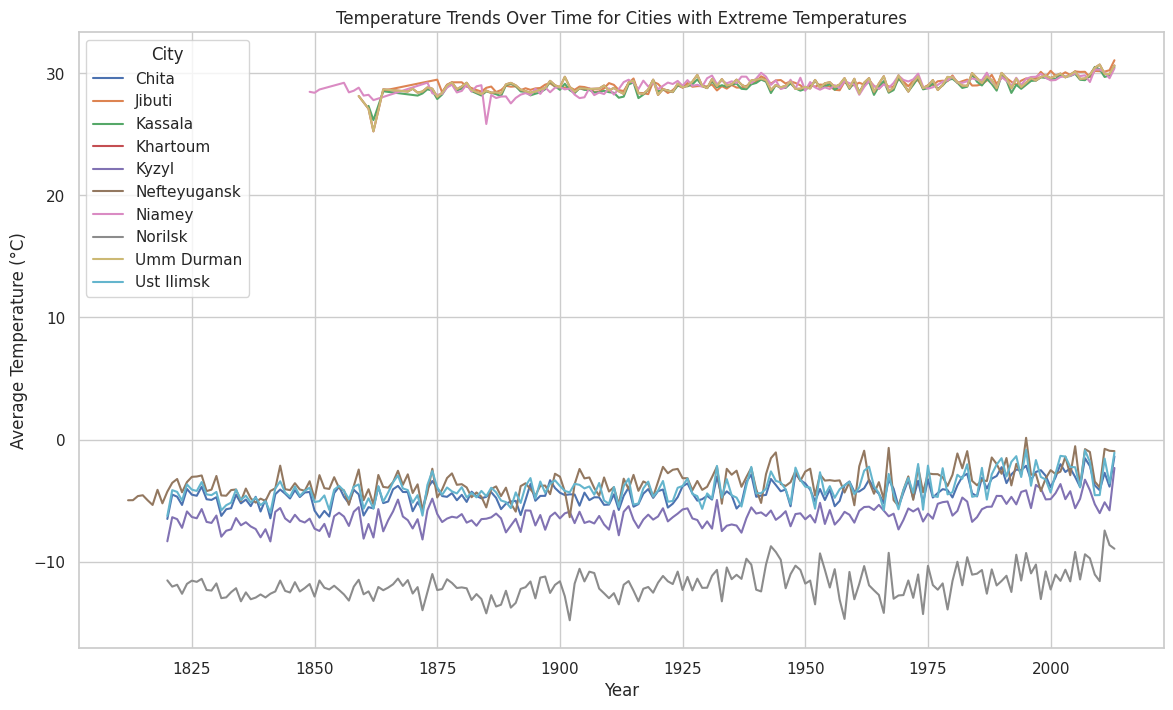

In [ ]:
# Select cities with extreme temperatures (highest and lowest average temperatures)
extreme_cities = global_temp_by_city.groupby('City')['AverageTemperature'].agg(['mean', 'std']).reset_index()
extreme_cities = extreme_cities.sort_values(by='mean', ascending=False)
top_extreme_cities = pd.concat([extreme_cities.head(5), extreme_cities.tail(5)])['City'].tolist()

# Filter data for these cities
extreme_city_data = global_temp_by_city[global_temp_by_city['City'].isin(top_extreme_cities)]

# Plot temperature trends over time for these cities
plt.figure(figsize=(14, 8))
sns.lineplot(data=extreme_city_data, x='Year', y='AverageTemperature', hue='City', errorbar=None)
plt.title('Temperature Trends Over Time for Cities with Extreme Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='City')
plt.show()


Revisiting the Questions for Exploration and Answering Them Based on Initial Analysis
1. Temperature Trends:

How have average temperatures changed over the last 100 years in major cities?
From the visual exploration, especially from the first scatterplot, it is evident that temperatures in major cities have generally shown an increasing trend over the last century.

Are there specific cities or countries where temperature changes are more pronounced?
From the categorical plot of average temperatures by city, it appears that certain cities like La Paz and Ulaanbaatar have more extreme temperature ranges compared to others. These cities, located in different regions, show that pronounced temperature changes can be observed in various parts of the world, likely due to their unique geographical and climatic conditions.
2. Geographical Analysis:

Which regions experience the highest average temperatures?
The bar plot of average temperatures by continent clearly shows that regions like Africa and Asia experience higher average temperatures compared to other continents. This aligns with the general understanding of global climatic patterns where equatorial and tropical regions tend to be warmer.

How do temperature variations differ between continents?
The analysis suggests that continents like Africa and Asia have higher average temperatures with less pronounced seasonal variation, while continents like Europe and North America exhibit more variation. For instance, seasonal patterns are more pronounced in cities in the Northern Hemisphere due to the higher latitudinal range and the presence of temperate zones.
3. Seasonal Patterns:

Are there noticeable seasonal patterns in temperature changes for different cities?
The line plot of seasonal temperature variations for selected cities like New York, London, Sydney, Tokyo, and Cairo shows that there are distinct seasonal patterns. Cities in the Northern Hemisphere (e.g., New York, London, Tokyo) exhibit higher temperatures in summer months (June-August) and lower temperatures in winter months (December-February). Conversely, Sydney, located in the Southern Hemisphere, shows opposite seasonal patterns with higher temperatures during December-February and lower temperatures during June-August.

How do these patterns vary between the Northern and Southern Hemispheres?
As observed, cities in the Northern Hemisphere have their warmest months during June-August and their coolest during December-February. In contrast, cities in the Southern Hemisphere have their warmest months during December-February and their coolest during June-August. This hemispherical difference is due to the tilt of the Earth's axis, causing opposite seasons in the two hemispheres.
New Questions Based on Early Findings:

    Urban vs. Rural Temperature Differences:
        Do urban areas experience more significant temperature increases compared to rural areas due to the urban heat island effect?

    Impact of Altitude on Temperature:
        How does altitude influence the average temperature in different cities? Are cities at higher altitudes experiencing less pronounced temperature changes?

    Extreme Weather Events:
        Are there trends indicating an increase in extreme weather events, such as heatwaves or cold spells, in certain regions?

Hypotheses Based on Initial Analysis:

    Hypothesis 1:
        Major cities have experienced a significant increase in average temperatures over the last decade, consistent with global warming trends.

    Hypothesis 2:
        Temperature changes are more pronounced in urban areas compared to rural areas due to the urban heat island effect.

    Hypothesis 3:
        Regions like Africa and Asia experience the highest average temperatures due to their geographical location near the equator.